<a href="https://colab.research.google.com/github/Pree-om/deep-learning/blob/main/LeNet5BETTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNNs - **Better LeNet5**

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from keras.datasets import mnist

In [18]:
(train_img, train_labels), (test_img, test_labels) = mnist.load_data()

In [19]:
print(train_img.shape)
print(test_img.shape)

(60000, 28, 28)
(10000, 28, 28)


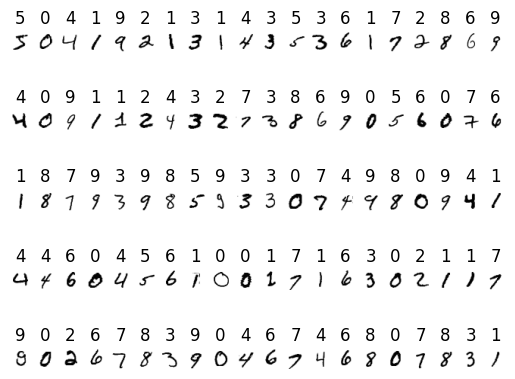

In [20]:
for i in range(100):
  plt.subplot(5, 20, i+1)
  plt.imshow(train_img[i], cmap='gray_r') #to show images
  plt.title(train_labels[i])
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')
plt.show()

In [21]:
print(train_img[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [22]:
m,n = train_img[0].shape

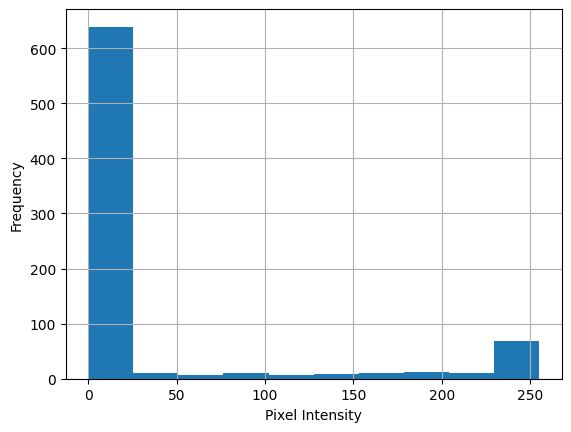

In [23]:
plt.hist(train_img[0].reshape(m*n)) #reshaped as it's a vector
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid()
plt.show()

0: Black, 253: Grey(Brightest)

In [24]:
#Scaling it to avaoid gradient explosion
train_img = train_img/255
test_img = test_img/255
print(train_img[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

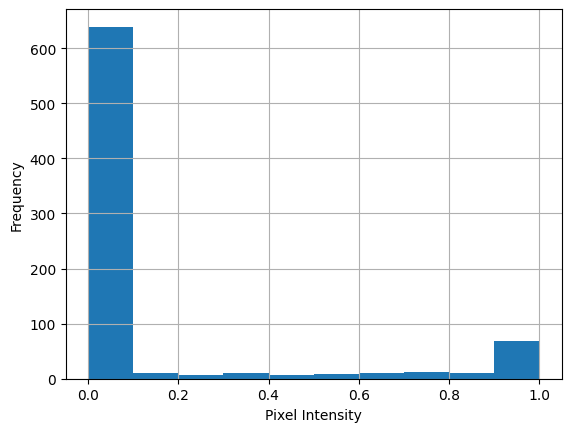

In [25]:
plt.hist(train_img[0].reshape(m*n)) #reshaped as it's a vector
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [26]:
#from keras.models import Sequential
#from keras.layers import Dense, Flatten

#model = Sequential()
#model.add(Flatten(input_shape=(m,n))) #2D -> 1D
#model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='relu'))
#model.add(Dense(10, activation='softmax')) # for classification, 10 classes as digits from 0 to 9


#from keras.models import Sequential
#from keras.layers import MaxPooling2D, Flatten, Dense, Dropout, Conv2D

#model = Sequential()
#model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
#model.add(MaxPooling2D((2,2)))
#model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
#model.add(MaxPooling2D((2,2)))
#model.add(Flatten())
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(10, activation='softmax'))
#model.summary()

from keras.models import Sequential
from keras.layers import MaxPooling2D, Flatten, Dense, Dropout, Conv2D, Activation, AveragePooling2D

model = Sequential()
model.add(Conv2D(6, 5, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2))
model.add(Conv2D(16, 5, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(120, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 2, 2, 120)           │          17,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          40,404 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,226 (239.16 KB)

 Trainable params: 61,226 (239.16 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# compilation and training
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_img, train_labels, epochs=30) #fits models to data(TRAINING), model.fit(input, output, epochs=10)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9984 - loss: 0.0042
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9988 - loss: 0.0037
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9983 - loss: 0.0048
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9983 - loss: 0.0049
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9987 - loss: 0.0036
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9989 - loss: 0.0035
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9986 - loss: 0.0036
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9980 - loss: 0.0058
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9991 - loss: 0.0032
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9986 - loss: 0.0037
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9981 - loss: 0.0054
Epoch 12/30
1875/1875 ━━━━

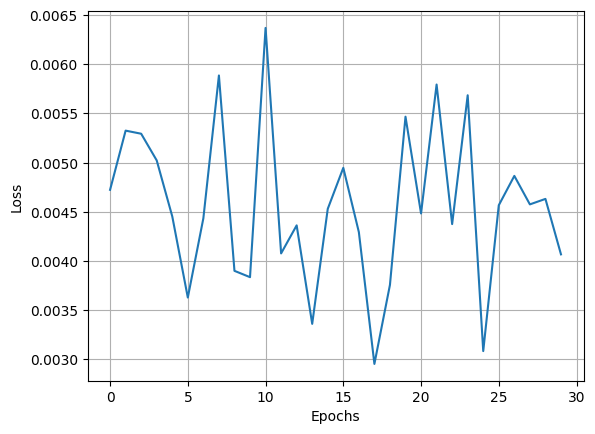

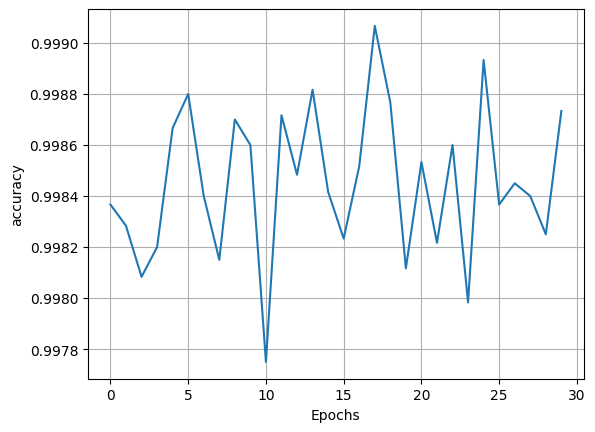

In [35]:
#plotting a epoch vs loss graph
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()
#plotting a epoch vs accuracy graph
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [36]:
#train
loss, accuracy = model.evaluate(train_img, train_labels)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9985 - loss: 0.0036
Loss: 0.003938958048820496
Accuracy: 0.9986000061035156


7685
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


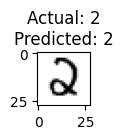

8167
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


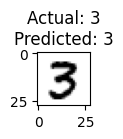

1235
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


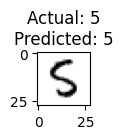

7670
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


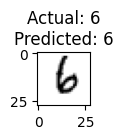

7697
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


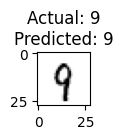

4044
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


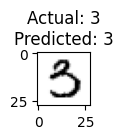

3102
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


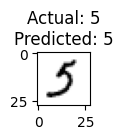

5783
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


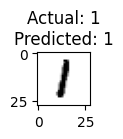

2286
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


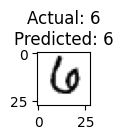

6062
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


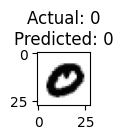

In [45]:
for i in range (10):
  index=np.random.randint(0,10000)
  print(index)
  plt.subplot(5,5,i+1)
  plt.imshow(test_img[index], cmap='gray_r')
  predicted_label = np.argmax(model.predict(test_img[index].reshape(1, 28, 28, 1)))
  plt.title(f'Actual: {test_labels[index]}'+'\n'+f'Predicted: {predicted_label}')
  plt.subplots_adjust(hspace=0.5)
  plt.show()